<a href="https://colab.research.google.com/github/VeraMendes/DS-Unit-2-Kaggle-Challenge/blob/master/module2/Vera_Mendes_Assignment_Kaggle_challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 2

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
import pandas_profiling
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from ipywidgets import interact
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [90]:
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [85]:
# splitting train into train & validation
train,val = train_test_split(train, train_size = 0.8, test_size = 0.2,
                             stratify = train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [18]:
# exploring categorical features
px.scatter(train, x='status_group', y='quantity', color="status_group", size_max=15500, facet_col='waterpoint_type')

In [20]:
px.scatter(train, x='status_group', y='payment', color="status_group", size_max=15500, facet_col='extraction_type')

In [12]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [0]:
def data_wrangle(X):
  # using same method for all data

  # create a copy
  X = X.copy()

  # values of latitude near zero will be treated as zero
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # date_recorded appears as object, change into datetime format
  X['date_recorded'] = pd.to_datetime(X['date_recorded'],
                                      infer_datetime_format=True)
  
  # extract year and month of inspection
  X['year_inspection'] = X['date_recorded'].dt.year
  X['month_inspection'] = X['date_recorded'].dt.month

  # extract number of years till inspection
  X['inspection_waiting_time'] = X['year_inspection'] - X['construction_year']

  # When columns have zeros and shouldn't, they are like null values.
  # So we will replace the zeros with nulls, and impute missing values later.
  cols_to_clean = ['longitude', 'latitude', 'amount_tsh','construction_year',
                   'gps_height', 'permit','public_meeting', 'region_code',
                   'source', 'quantity','quality_group', 'payment',
                   'water_quality', 'source_class','management',
                   'management_group', 'population','installer','funder',
                   'scheme_management', 'scheme_name']
  for col in cols_to_clean:
    X[col] = X[col].replace(0, np.nan)
    X[col] = X[col].replace('unknown', np.nan)
    X[col+'_MISSING'] = X[col].isnull()

  X['inspection_waiting_time_MISSING'] = X['inspection_waiting_time'].isnull()

  # binning numeric values
  cy_cut_points = [0, 0.1, 1980, 2000, 2013]
  cy_label_names = ['0-0.1', '1960-1980', '1981-2000', '2001-2013']
  X['construction_year_cat'] = pd.cut(X['construction_year'], cy_cut_points, labels=cy_label_names)

  gps_cut_points = [-63, 250, 1100, 1600, 2770]
  gps_label_names = ['-63-250', '251-1100', '1101-1600', '1601-2700']
  X['gps_height_cat'] = pd.cut(X['gps_height'], gps_cut_points, labels=gps_label_names)

  # quantity & quantity_group same as payment & payment_type are duplicates
  # drop duplicates, date_recorded, less relevance columns and columns used for binning
  X = X.drop(columns=['quantity_group','payment_type','date_recorded', 'recorded_by',
                      'gps_height','construction_year'])

  # create a top number of values in categorical features with too many unique or little values:
  ET_top6 = X['extraction_type'].value_counts()[:6].index
  ETG_top6 = X['extraction_type_group'].value_counts()[:6].index
  M_top7 = X['management'].value_counts()[:7].index
  S_top5 = X['source'].value_counts()[:5].index
  WQ_top2 = X['water_quality'].value_counts()[:2].index
  W_top4 = X['waterpoint_type'].value_counts()[:4].index


  # Where categorical value is not on the top values,
  # replace the value with 'Other'
  X.loc[~X['extraction_type'].isin(ET_top6), 'extraction_type'] = 'Other'
  X.loc[~X['extraction_type_group'].isin(ETG_top6), 'extraction_type_group'] = 'Other'
  X.loc[~X['management'].isin(M_top7), 'management'] = 'Other'
  X.loc[~X['source'].isin(S_top5), 'source'] = 'Other'
  X.loc[~X['water_quality'].isin(WQ_top2), 'water_quality'] = 'Other'
  X.loc[~X['waterpoint_type'].isin(W_top4), 'waterpoint_type'] = 'Other'

  # return my data_wrangle
  return X

train = data_wrangle(train)
val = data_wrangle(val)
test = data_wrangle(test) 


# defining my y vector
target = 'status_group'

# Get my train DF without the target
train_features = train.drop(columns=[target])

# list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

# arranging my X features and y vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [57]:
%%time
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
)

# fit on train data and give validation accuracy on val data
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8063131313131313
CPU times: user 15 s, sys: 69.7 ms, total: 15.1 s
Wall time: 8.26 s


In [0]:
# Predict on test data
y_pred = pipeline.predict(X_test)

In [0]:
submission = test[['id']].copy()
submission['status_group'] = y_pred
submission.describe()
submission.to_csv('VMsubmission.csv', index=False)

In [87]:
%%time
# playing with max_depth
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=100,max_depth=21,random_state=42,n_jobs=-1)
)

# fit on train data and give validation accuracy on val data
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8074915824915825
CPU times: user 13.6 s, sys: 90 ms, total: 13.7 s
Wall time: 7.56 s


In [0]:
# Predict on test data
y_pred2 = pipeline.predict(X_test)

In [0]:
submission = test[['id']].copy()
submission['status_group'] = y_pred2
submission.describe()
submission.to_csv('VMsubmission1.csv', index=False)

In [62]:
print('X_Train shape before encoding:', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
print('X_Train shape after encoding:', encoded.shape)

X_Train shape before encoding: (47520, 54)
X_Train shape after encoding: (47520, 54)


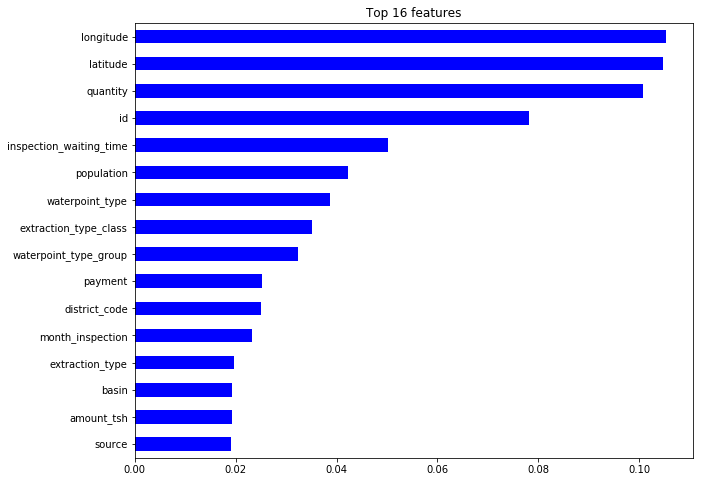

In [64]:
%matplotlib inline
# Get feature importances
RF = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(RF.feature_importances_, encoded.columns)

# Plot feature importances
n = 16
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [0]:
# different way of running my code

In [91]:
# splitting train into train & validation
train,val = train_test_split(train, train_size = 0.75, test_size = 0.25,
                             stratify = train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((44550, 41), (14850, 41), (14358, 40))

In [92]:
%%time

# Arranging X features matrix and y target vector
# Using all features
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

# Creating my pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, max_depth=24, random_state=42, n_jobs=-1)
)

# Fitting on train, scoring on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8133333333333334
CPU times: user 18.5 s, sys: 108 ms, total: 18.6 s
Wall time: 10.1 s


In [93]:
print('X_Train shape before encoding:', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
print('X_Train shape after encoding:', encoded.shape)

X_Train shape before encoding: (44550, 40)
X_Train shape after encoding: (44550, 40)


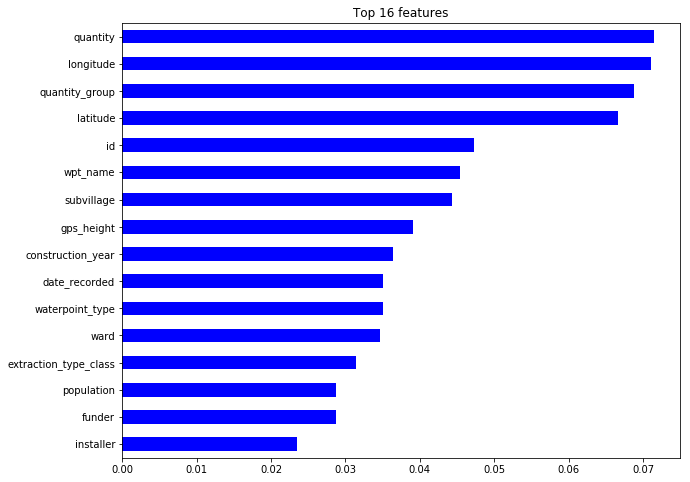

In [94]:
%matplotlib inline
# Get feature importances
RF = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(RF.feature_importances_, encoded.columns)

# Plot feature importances
n = 16
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [0]:
# Predict on test data
y_pred7 = pipeline.predict(X_test)

In [0]:
submission = test[['id']].copy()
submission['status_group'] = y_pred7
submission.describe()
submission.to_csv('VMsubmission6.csv', index=False)